In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:

df=pd.read_csv("Employee.csv")

In [5]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3.0,34,Male,No,0,0
1,Bachelors,2013,Pune,1.0,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3.0,38,Female,No,2,0
3,Masters,2016,Bangalore,3.0,27,Male,No,5,1
4,Masters,2017,Pune,3.0,24,Male,Yes,2,1


In [7]:
df.shape

(4653, 9)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Education                  4627 non-null   object 
 1   JoiningYear                4653 non-null   int64  
 2   City                       4653 non-null   object 
 3   PaymentTier                4632 non-null   float64
 4   Age                        4653 non-null   int64  
 5   Gender                     4653 non-null   object 
 6   EverBenched                4653 non-null   object 
 7   ExperienceInCurrentDomain  4653 non-null   int64  
 8   LeaveOrNot                 4653 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 327.3+ KB


In [11]:
df.isnull().sum()

Education                    26
JoiningYear                   0
City                          0
PaymentTier                  21
Age                           0
Gender                        0
EverBenched                   0
ExperienceInCurrentDomain     0
LeaveOrNot                    0
dtype: int64

<Axes: xlabel='PaymentTier', ylabel='Count'>

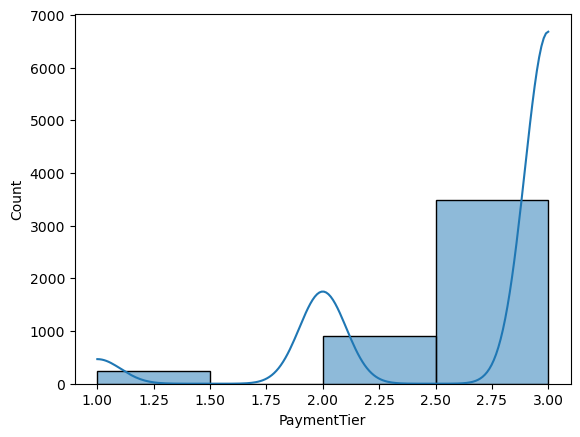

In [13]:
sns.histplot(x="PaymentTier",bins=4,data=df,kde=True)

In [15]:
df["PaymentTier"].mode()

0    3.0
Name: PaymentTier, dtype: float64

In [17]:
df["PaymentTier"]=df["PaymentTier"].fillna(3.0)

<Axes: xlabel='PaymentTier', ylabel='Count'>

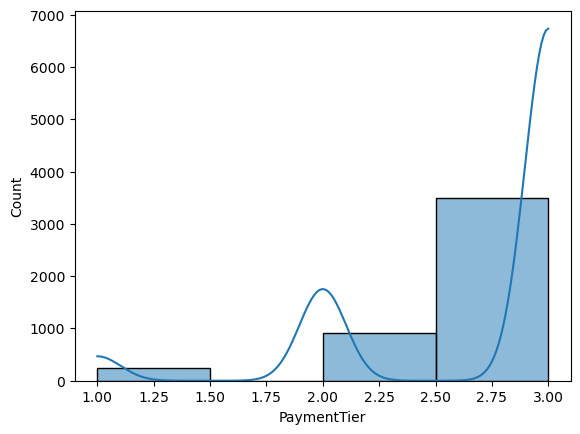

In [19]:
sns.histplot(x="PaymentTier",bins=4,data=df,kde=True)

<Axes: xlabel='Education', ylabel='Count'>

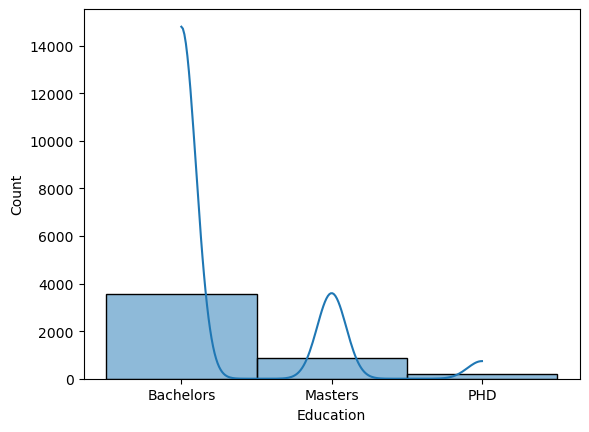

In [21]:
sns.histplot(x="Education",bins=4,data=df,kde=True)

In [23]:
df["Education"].mode()

0    Bachelors
Name: Education, dtype: object

In [25]:
df["Education"]=df["Education"].fillna("Bachelors")

<Axes: xlabel='Education', ylabel='Count'>

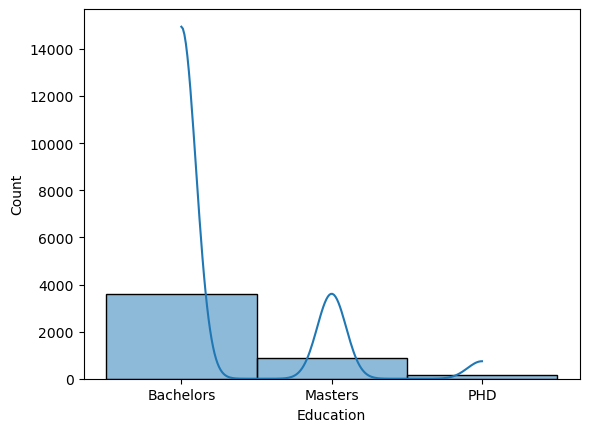

In [26]:


sns.histplot(x="Education",bins=4,data=df,kde=True)

<Axes: xlabel='JoiningYear'>

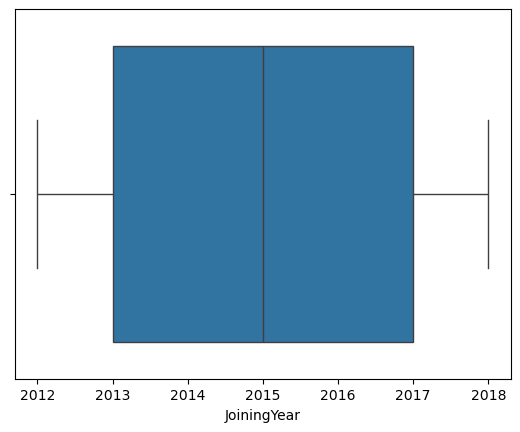

In [27]:
sns.boxplot(x="JoiningYear",data=df)

<Axes: xlabel='Age'>

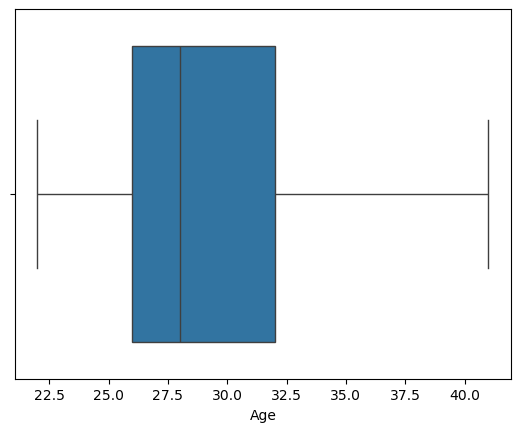

In [29]:
sns.boxplot(x="Age",data=df)

<Axes: xlabel='ExperienceInCurrentDomain'>

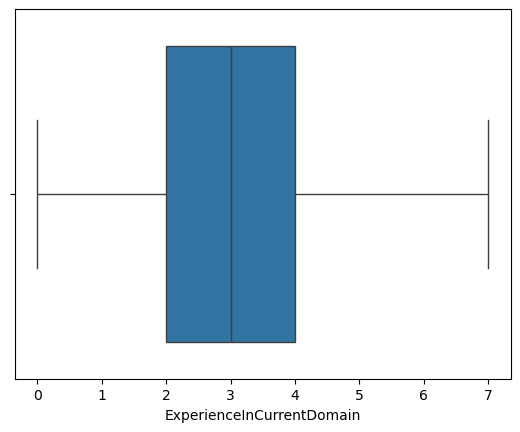

In [30]:
sns.boxplot(x="ExperienceInCurrentDomain",data=df)

In [31]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3.0,34,Male,No,0,0
1,Bachelors,2013,Pune,1.0,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3.0,38,Female,No,2,0
3,Masters,2016,Bangalore,3.0,27,Male,No,5,1
4,Masters,2017,Pune,3.0,24,Male,Yes,2,1


In [32]:
df["Education"].unique()

array(['Bachelors', 'Masters', 'PHD'], dtype=object)

In [33]:
import pandas as pd
from scipy.stats import chi2_contingency

# Example: if not already categorical
df['Education'] = df['Education'].astype('category')
df['LeaveOrNot'] = df['LeaveOrNot'].astype('category')

# Create a contingency table
contingency_table = pd.crosstab(df['Education'], df['LeaveOrNot'])

# Run Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print results
print("Chi-square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("P-value:", p)
print("Expected Frequencies Table:")
print(expected)

# Conclusion
if p < 0.05:
    print("There is a significant association between Education and LeaveOrNot.")
else:
    print("There is NO significant association between Education and LeaveOrNot.")

Chi-square Statistic: 102.14398968002908
Degrees of Freedom: 2
P-value: 6.602591997626852e-23
Expected Frequencies Table:
[[2364.71351816 1239.28648184]
 [ 570.83816892  299.16183108]
 [ 117.44831292   61.55168708]]
There is a significant association between Education and LeaveOrNot.


In [34]:
import scipy.stats as stats

LeaveOrNot_yes= df[df['LeaveOrNot'] == 0]['JoiningYear']
LeaveOrNot_no=LeaveOrNot= df[df['LeaveOrNot'] == 1]['JoiningYear']

t_stat, p_value = stats.ttest_ind(LeaveOrNot_yes,LeaveOrNot_no)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("There is difference between JoiningYear and LeaveOrNot.")  # Reject the null hypothesis(accpeting alternative)
else:
    print("There is no statistically significant difference in 	JoiningYear between days with and without LeaveOrNot.")  # Fail to reject the null hypothesis

T-statistic: -12.601776125876363
P-value: 7.90161666436133e-36
There is difference between JoiningYear and LeaveOrNot.


In [36]:
df["City"].unique()

array(['Bangalore', 'Pune', 'New Delhi'], dtype=object)

In [37]:
import pandas as pd
from scipy.stats import chi2_contingency

# Example: if not already categorical
df['City'] = df['City'].astype('category')
df['LeaveOrNot'] = df['LeaveOrNot'].astype('category')

# Create a contingency table
contingency_table = pd.crosstab(df['City'], df['LeaveOrNot'])

# Run Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print results
print("Chi-square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("P-value:", p)
print("Expected Frequencies Table:")
print(expected)

# Conclusion
if p < 0.05:
    print("There is a significant association between City and LeaveOrNot.")
else:
    print("There is NO significant association between City and LeaveOrNot.")

Chi-square Statistic: 206.15885400194648
Degrees of Freedom: 2
P-value: 1.7106992135618012e-45
Expected Frequencies Table:
[[1461.8706211   766.1293789 ]
 [ 759.14915109  397.85084891]
 [ 831.98022781  436.01977219]]
There is a significant association between City and LeaveOrNot.


In [38]:
df["PaymentTier"].unique()

array([3., 1., 2.])

In [39]:
import pandas as pd
from scipy.stats import chi2_contingency

# Example: if not already categorical
df['PaymentTier'] = df['PaymentTier'].astype('category')
df['LeaveOrNot'] = df['LeaveOrNot'].astype('category')

# Create a contingency table
contingency_table = pd.crosstab(df['PaymentTier'], df['LeaveOrNot'])

# Run Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print results
print("Chi-square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("P-value:", p)
print("Expected Frequencies Table:")
print(expected)

# Conclusion
if p < 0.05:
    print("There is a significant association between PaymentTier and LeaveOrNot.")
else:
    print("There is NO significant association between PaymentTier and LeaveOrNot.")

Chi-square Statistic: 335.93747097351775
Degrees of Freedom: 2
P-value: 1.1274701322573844e-73
Expected Frequencies Table:
[[ 159.4410058    83.5589942 ]
 [ 597.7397378   313.2602622 ]
 [2295.81925639 1203.18074361]]
There is a significant association between PaymentTier and LeaveOrNot.


In [40]:
import scipy.stats as stats

LeaveOrNot_yes= df[df['LeaveOrNot'] == 0]['Age']
LeaveOrNot_no=LeaveOrNot= df[df['LeaveOrNot'] == 1]['Age']

t_stat, p_value = stats.ttest_ind(LeaveOrNot_yes,LeaveOrNot_no)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("There is difference between Age and LeaveOrNot.")  # Reject the null hypothesis(accpeting alternative)
else:
    print("There is no statistically significant difference in 	Age between  LeaveOrNot.")  # Fail to reject the null hypothesis

T-statistic: 3.491261554959713
P-value: 0.0004852123420648862
There is difference between Age and LeaveOrNot.


In [41]:
import pandas as pd
from scipy.stats import chi2_contingency

# Example: if not already categorical
df['Gender'] = df['Gender'].astype('category')
df['LeaveOrNot'] = df['LeaveOrNot'].astype('category')

# Create a contingency table
contingency_table = pd.crosstab(df['Gender'], df['LeaveOrNot'])

# Run Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print results
print("Chi-square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("P-value:", p)
print("Expected Frequencies Table:")
print(expected)

# Conclusion
if p < 0.05:
    print("There is a significant association between Gender and LeaveOrNot.")
else:
    print("There is NO significant association between Gender and LeaveOrNot.")

Chi-square Statistic: 225.6953561969211
Degrees of Freedom: 1
P-value: 5.177873883438753e-51
Expected Frequencies Table:
[[1230.2546744  644.7453256]
 [1822.7453256  955.2546744]]
There is a significant association between Gender and LeaveOrNot.


In [42]:
import pandas as pd
from scipy.stats import chi2_contingency

# Example: if not already categorical
df['EverBenched'] = df['EverBenched'].astype('category')
df['LeaveOrNot'] = df['LeaveOrNot'].astype('category')

# Create a contingency table
contingency_table = pd.crosstab(df['EverBenched'], df['LeaveOrNot'])

# Run Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print results
print("Chi-square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("P-value:", p)
print("Expected Frequencies Table:")
print(expected)

# Conclusion
if p < 0.05:
    print("There is a significant association between EverBenched and LeaveOrNot.")
else:
    print("There is NO significant association between EverBenched and LeaveOrNot.")

Chi-square Statistic: 28.086147926708364
Degrees of Freedom: 1
P-value: 1.1603340647939294e-07
Expected Frequencies Table:
[[2739.36707501 1435.63292499]
 [ 313.63292499  164.36707501]]
There is a significant association between EverBenched and LeaveOrNot.


In [43]:
df["ExperienceInCurrentDomain"].unique()

array([0, 3, 2, 5, 1, 4, 7, 6], dtype=int64)

In [44]:
import pandas as pd
from scipy.stats import chi2_contingency

# Example: if not already categorical
df['ExperienceInCurrentDomain'] = df['ExperienceInCurrentDomain'].astype('category')
df['LeaveOrNot'] = df['LeaveOrNot'].astype('category')

# Create a contingency table
contingency_table = pd.crosstab(df['ExperienceInCurrentDomain'], df['LeaveOrNot'])

# Run Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print results
print("Chi-square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("P-value:", p)
print("Expected Frequencies Table:")
print(expected)

# Conclusion
if p < 0.05:
    print("There is a significant association between ExperienceInCurrentDomain and LeaveOrNot.")
else:
    print("There is NO significant association between ExperienceInCurrentDomain and LeaveOrNot.")

Chi-square Statistic: 14.060823933061311
Degrees of Freedom: 7
P-value: 0.050110055647237466
Expected Frequencies Table:
[[232.92821835 122.07178165]
 [366.1237911  191.8762089 ]
 [713.21964324 373.78035676]
 [515.72275951 270.27724049]
 [610.86245433 320.13754567]
 [602.98882441 316.01117559]
 [  5.24908661   2.75091339]
 [  5.90522244   3.09477756]]
There is NO significant association between ExperienceInCurrentDomain and LeaveOrNot.


In [45]:
df.drop("ExperienceInCurrentDomain", axis=1, inplace=True)

In [46]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,LeaveOrNot
0,Bachelors,2017,Bangalore,3.0,34,Male,No,0
1,Bachelors,2013,Pune,1.0,28,Female,No,1
2,Bachelors,2014,New Delhi,3.0,38,Female,No,0
3,Masters,2016,Bangalore,3.0,27,Male,No,1
4,Masters,2017,Pune,3.0,24,Male,Yes,1


In [47]:
from sklearn.preprocessing import LabelEncoder

In [48]:
enc=LabelEncoder()

In [49]:
df["Education"]=enc.fit_transform(df["Education"])

In [50]:
df["City"]=enc.fit_transform(df["City"])

In [51]:
df["Gender"]=enc.fit_transform(df["Gender"])

In [52]:
df["EverBenched"]=enc.fit_transform(df["EverBenched"])

In [53]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,LeaveOrNot
0,0,2017,0,3.0,34,1,0,0
1,0,2013,2,1.0,28,0,0,1
2,0,2014,1,3.0,38,0,0,0
3,1,2016,0,3.0,27,1,0,1
4,1,2017,2,3.0,24,1,1,1


In [54]:
x=df.iloc[:,:-1]
x.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched
0,0,2017,0,3.0,34,1,0
1,0,2013,2,1.0,28,0,0
2,0,2014,1,3.0,38,0,0
3,1,2016,0,3.0,27,1,0
4,1,2017,2,3.0,24,1,1


In [55]:
y=df.iloc[:,-1]
y.head()

0    0
1    1
2    0
3    1
4    1
Name: LeaveOrNot, dtype: category
Categories (2, int64): [0, 1]

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [59]:
train_over=x_train.copy()

In [61]:
train_over["LeaveOrNot"]=y_train

In [62]:
# Class count
count_class_0, count_class_1 = train_over.LeaveOrNot.value_counts()

# Divide by class
df_class_0 = train_over[train_over['LeaveOrNot'] == 0]
df_class_1 = train_over[train_over['LeaveOrNot'] == 1]

In [63]:




df_class_0.shape

(2443, 8)

In [65]:
df_class_1.shape

(1279, 8)

In [66]:
df_class_1=df_class_1.sample(count_class_0,replace=True) 

In [67]:
df_class_1.shape

(2443, 8)

In [68]:
df_class_0.shape

(2443, 8)

In [69]:
df_new=pd.concat([df_class_0,df_class_1],axis=0)
df_new.head(2)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,LeaveOrNot
589,0,2012,0,3.0,25,1,0,0
2086,1,2017,2,2.0,29,1,0,0


In [70]:
x_train_balanced=df_new.drop("LeaveOrNot",axis=1)
y_train_balanced=df_new["LeaveOrNot"]

In [72]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train_balanced)
x_test_scaled=scaler.transform(x_test)

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    criterion='entropy',
    max_depth=None,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=13,
    n_estimators=107,
    random_state=42
)


In [76]:
model.fit(x_train_scaled,y_train_balanced)

RandomForestClassifier(criterion='entropy', min_samples_split=13,
                       n_estimators=107, random_state=42)

In [77]:
y_over=model.predict(x_test_scaled)

In [78]:
from sklearn.metrics import confusion_matrix, classification_report

over_cr = classification_report(y_test, y_over, target_names=["leave", "not"])
print("\nClassification Report:")
print(over_cr)



Classification Report:
              precision    recall  f1-score   support

       leave       0.88      0.91      0.90       610
         not       0.82      0.76      0.79       321

    accuracy                           0.86       931
   macro avg       0.85      0.84      0.84       931
weighted avg       0.86      0.86      0.86       931



In [79]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from scipy.stats import randint

# Load dataset
data = load_iris()
x_train, x_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

# Base model
rf = RandomForestClassifier(random_state=42)

# Parameter grid for Random Forest
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [3, 5, 10, None],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2', None]
}

# Randomized search
random_search = RandomizedSearchCV(estimator=rf,
                                   param_distributions=param_dist,
                                   n_iter=50,
                                   cv=5,
                                   random_state=42,
                                   n_jobs=-1)

# Fit the model
random_search.fit(x_train, y_train)

# Best parameters
print("Best Parameters:", random_search.best_params_)


Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 13, 'n_estimators': 107}
